# Data Analysis Project 6: Graphing Video Game Sales
You’re reviewing sales for the top 100 video games from the years 2000-2015 to gather insights. Use Python’s Pandas, Matplotlib, and Seaborn libraries to interact with the data and create graphs.

Import:
- Pandas
- Matplotlib
- Seaborn
- CSV data
- Set Seaborn theme

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
games = pd.read_csv('top100videogamesales.csv')
sns.set_theme()

## Question 1

Regional Sales by Publisher: Create a stacked column (or bar) chart to show the sales by region for each publisher in the data. Explain your chart with markdown and detail which publisher had the most sales.

### Strategy
- Group the publishers and sum the sales for each region.

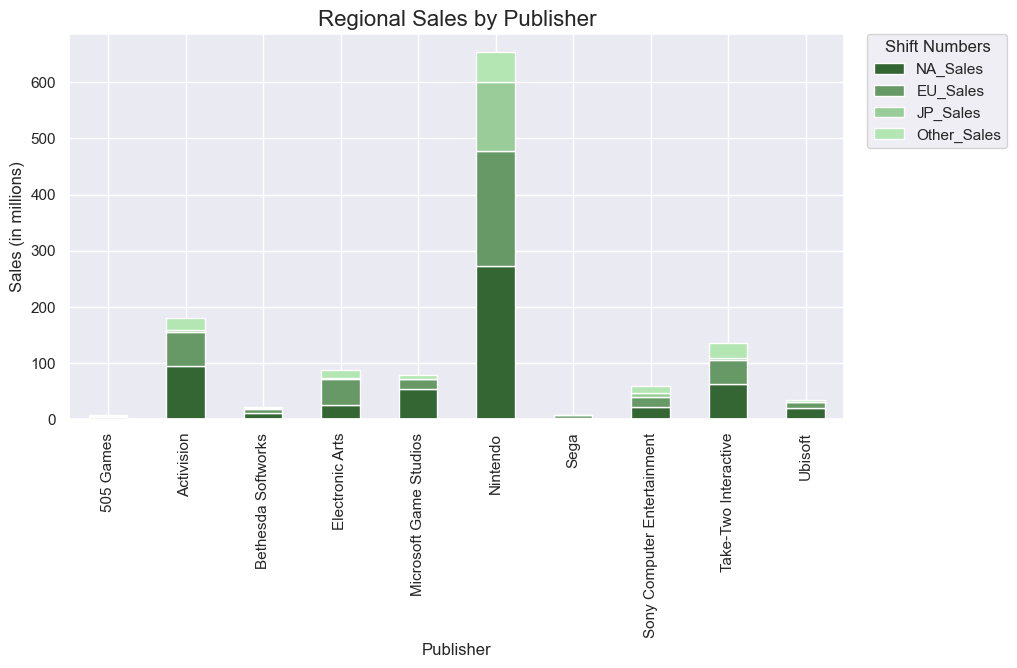

In [212]:
# Calculation
sales_by_publisher = games.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Graph
colors = ['#336633', '#669966', '#99CC99', '#B3E6B3', '#CCFFCC', '#D9FFD9', '#E6FFE6', '#F2FFF2', '#F9FFF9', '#FCFFFC']
sales_by_publisher.set_index('Publisher').plot(kind='bar', stacked=True, color=colors, figsize=(10, 5)) 
plt.title('Regional Sales by Publisher', fontsize=16)
plt.legend(title='Shift Numbers', bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Sales (in millions)', fontsize=12)
plt.show()

### Analysis
Nintendo has a strong lead in the North American market, the European market, the Japanese market, and Other markets.
Activison is a far away second in the North American market and European market.
Activision and Take-Two Interactive are both closer seconds in Other markets.

## Question 2
Global Sales by Year: Create a line chart to show the total global sales for each year. Explain the result of the chart in markdown.

### Strategy
- Group the data by year and sum the 'Global_Sales'.

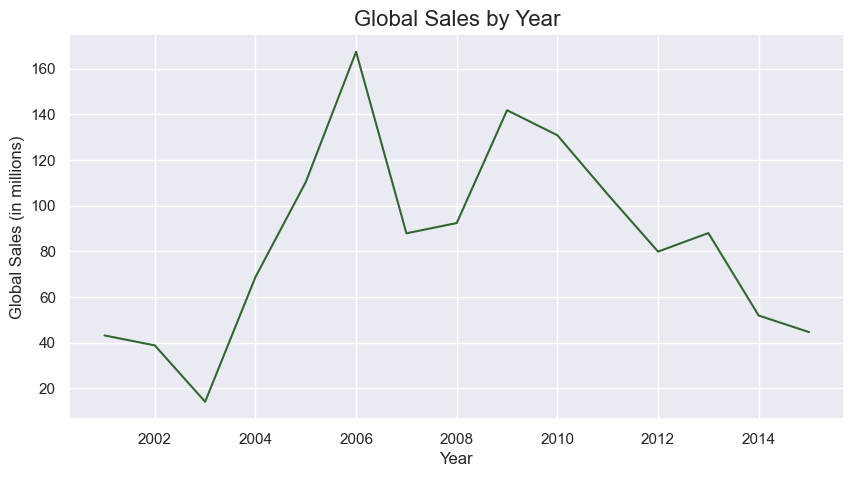

In [213]:
# Calculation
sales_by_year = games.groupby('Year')['Global_Sales'].sum().reset_index()

# Graph
plt.figure(figsize=(10, 5))
plt.plot(sales_by_year['Year'], sales_by_year['Global_Sales'], color='#336633')
plt.title('Global Sales by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global Sales (in millions)', fontsize=12)
plt.show()

### Analysis
The global game sales between 2002 and 2014 have been volatile with peaks and troughs. Sales dropped to an all time low in 2003, peaked in 2006, dipped in 2007, rose to the second peak in 2009, then continually declined until 2014 where it was very nearlly at 2002 levels. 

## Question 3
Global Sales Distribution for Action Games: Create a histogram to show the global sales distribution for games with Action as the genre. Explain the chart with markdown.

### Strategy
- Filter the dataframe for only action games.
- Use Seaborn to display them by 'Global_Sales'

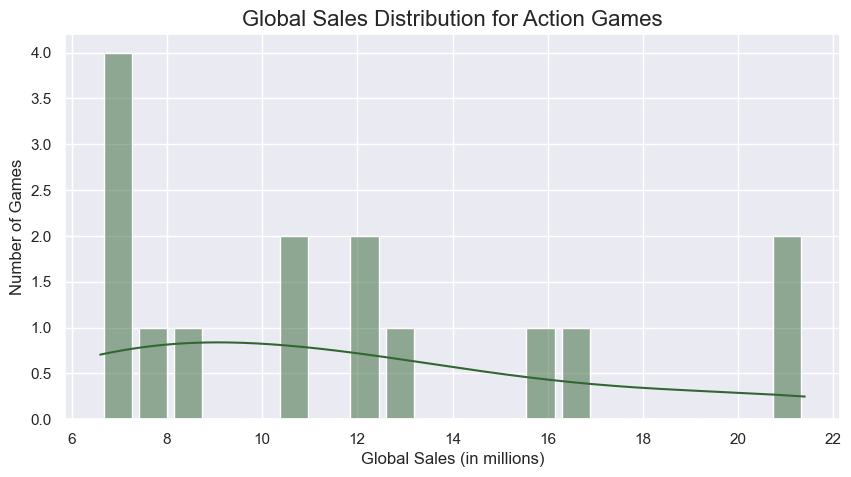

In [214]:
# Calculation
action_games = games[games['Genre'] == 'Action']

# Graph
plt.figure(figsize=(10, 5))
sns.histplot(data=action_games, x='Global_Sales', bins=20, shrink=0.8, kde=True, color='#336633')
plt.title('Global Sales Distribution for Action Games', fontsize=16)
plt.xlabel('Global Sales (in millions)', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.show()

### Analysis
There are 15 Action games total in the data. 4 of them sold 7 million, while only 2 sold as high as 21 million. Amongst the other 9, 2 sold arround 8 million, 2 sold arround 16 million, and 1 sold arround 13 million. There are 2 sets of 2 games that had similar sales at just over 10 million and 12 million.

## Question 4
North American Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the North American market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.


### Strategy
- Sum 'NA_Sales' by 'Genre' and sort in descending order
- Calculate the sum for all game sales 'total_sales'
- Set the 'Other' category threshold at 5% of 'total_sales'
- Create a list of what genres are in the 'Other' category
- Sum the sales of games bellow the threshold into 'other_sales' and aggregate into a single value
- Filter for genres with sales equal to or above the threshold
- Add 'Other' to the list of genres

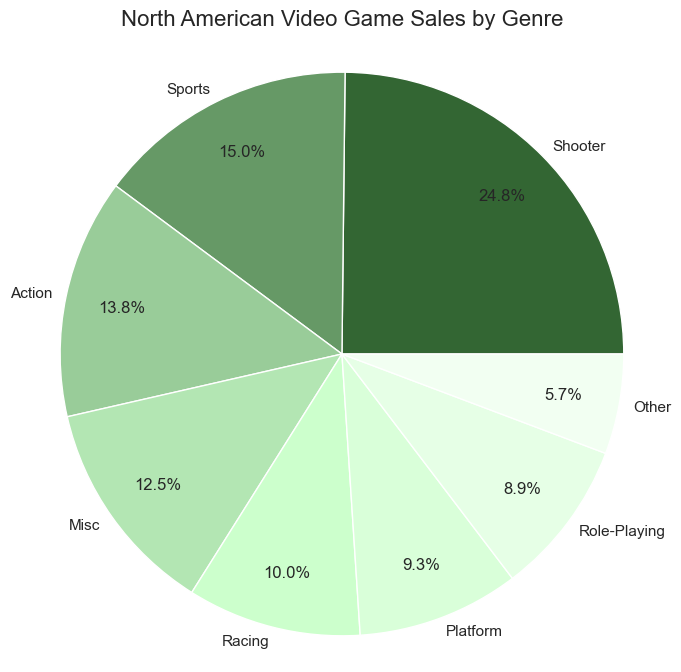

Genres included in 'Other' are: Simulation, Fighting, Puzzle.


In [215]:
# Calculation
sales_by_genre = games.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)
total_sales = sales_by_genre.sum()
threshold = 0.05 * total_sales
genres_below_threshold = sales_by_genre[sales_by_genre < threshold].index.tolist()
other_sales = sales_by_genre[sales_by_genre < threshold].sum()
sales_by_genre = sales_by_genre[sales_by_genre >= threshold]
sales_by_genre['Other'] = other_sales

# Graph
colors = ['#336633', '#669966', '#99CC99', '#B3E6B3', '#CCFFCC', '#D9FFD9', '#E6FFE6', '#F2FFF2', '#F9FFF9', '#FCFFFC']
plt.figure(figsize=(8, 8))
plt.pie(sales_by_genre, labels=sales_by_genre.index, autopct='%1.1f%%', colors= colors, pctdistance=0.8, labeldistance=1.05)
plt.title('North American Video Game Sales by Genre', fontsize=16, y=1.02)
plt.axis('equal')
plt.show()
print(f"Genres included in 'Other' are: {', '.join(genres_below_threshold)}.")


### Anaylsis
The largest genre of video games sold in North America is Shooters. With a 9.8% gap coming in second is Sports. What stands out is the Misc genre at 12.5% is not clearly defined and has a much higher market share than the Other category.

## Question 5
European Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the European market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.

### Strategy
- Sum 'EU_Sales' by 'Genre' and sort in descending order
- Calculate the sum for all game sales 'total_sales'
- Set the 'Other' category threshold at 5% of 'total_sales'
- Create a list of what genres are in the 'Other' category
- Sum the sales of games bellow the threshold into 'other_sales' and aggregate into a single value
- Filter for genres with sales equal to or above the threshold
- Add 'Other' to the list of genres

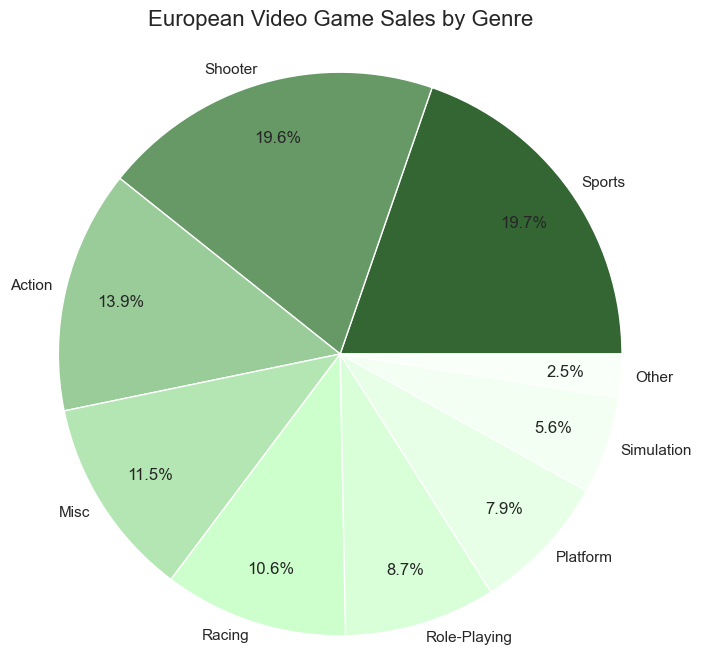

Genres included in 'Other' are: Puzzle, Fighting.


In [216]:
# Calculation
sales_by_genre = games.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False)
total_sales = sales_by_genre.sum()
threshold = 0.05 * total_sales
genres_below_threshold = sales_by_genre[sales_by_genre < threshold].index.tolist()
other_sales = sales_by_genre[sales_by_genre < threshold].sum()
sales_by_genre = sales_by_genre[sales_by_genre >= threshold]
sales_by_genre['Other'] = other_sales

# Graph
colors = ['#336633', '#669966', '#99CC99', '#B3E6B3', '#CCFFCC', '#D9FFD9', '#E6FFE6', '#F2FFF2', '#F9FFF9', '#FCFFFC']
plt.figure(figsize=(8, 8))
plt.pie(sales_by_genre, labels=sales_by_genre.index, autopct='%1.1f%%', colors= colors, pctdistance=0.8, labeldistance=1.05)
plt.title('European Video Game Sales by Genre', fontsize=16, y=1.02)
plt.axis('equal')
plt.show()
print(f"Genres included in 'Other' are: {', '.join(genres_below_threshold)}.")

### Anaylsis
The largest genre of video games sold in Europe is Sports. With a 0.1% gap coming in a close second is Shooters. What stands out is how close the second place genre is, as well no dominating first place and a smaller 'Other' Category.

## Question 6
Explain differences and similarities between the North American and European charts in markdown.

### Analysis
- The North American market has a 9.8% between 1st and 2nd place, wherease the European markets gap is only 0.1%.
- The European markets 'Other' category is 3.2% smaller than the North America markets.
- Both markets have 5 genres that are over 10% of the sales.
- Both markets have "Puzzles" and "Fighting" in their 'Other' categories.
- Simulation is not in the European 'Other' category but it is in the North American one.
- The role-playing and platform games are the only two where they have flipped positions when comparing each market.
- 'Misc' is within 1% in each market and unclear what that means.

## Question 7
Count of Games by Platform: Create a bar (or column) chart to show the total number of games created for each platform in the dataset. Explain the results in markdown.

### Strategy
- Create a series containing the counts of each unique instance of 'games['Platform']'

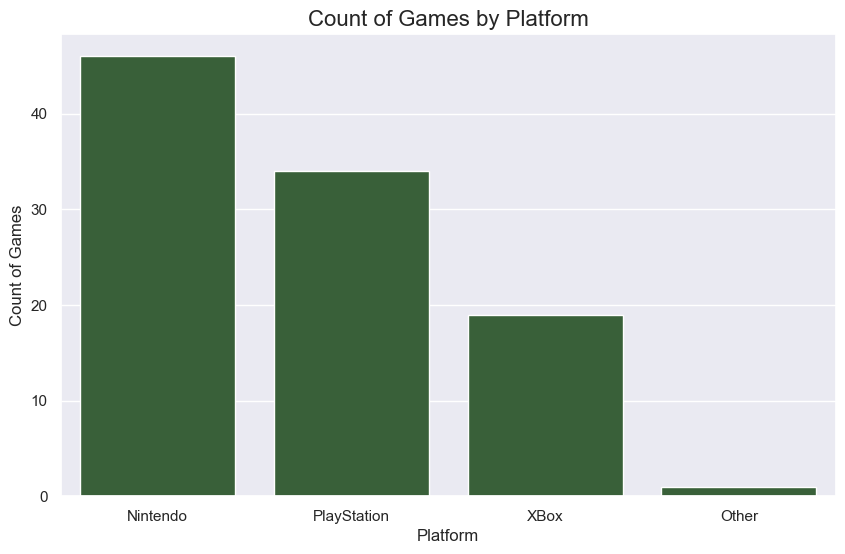

In [217]:
# Calculation
platform_count = games['Platform'].value_counts()

# Graph
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_count.index, y=platform_count.values, color='#336633')
plt.title('Count of Games by Platform', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Count of Games', fontsize=12)
plt.show()


### Analysis
Ninendo has the lead overall in the mid 40s, followed by playstation in the low 30s and Xbox in the high 20s. There exists a very small 'Other' category. Where this analysis gets tough is that Microsoft is pushing the argument that Windows itself is a gaming platform, so to be more thorough all PCs above a certain specification would need to counted before delcaring a market leader. (I'm on team buy a Macbook and build a PC haha)

## Extra Credit Question 1
What genre of game is present the most in the top 100 games from 2000-2015?

### Strategy
- Sort the games by 'Global_Sales' in descending order and take the top 100
- Group by genre and count the number of games by 'Name' in descending order
- Calculate the total number of games in the top 100
- Set the 'Other' category threshold at 5% of 'total_games'
- Create a list of what genres are in the 'Other' category
- Sum the count for genres below the threshold into an aggragated 'Other'
- Filter for genres with sales equal to or above the threshold
- Add 'Other' to the list of genres

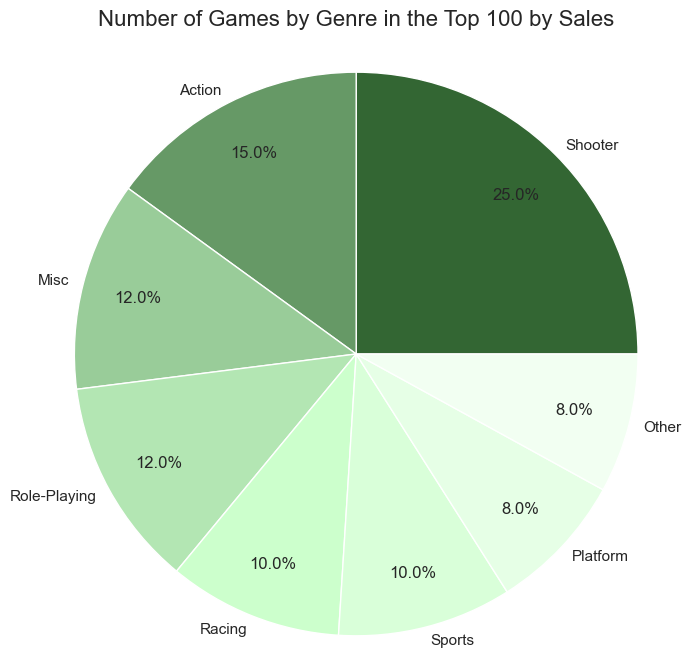

Genres included in 'Other' are: Simulation, Fighting, Puzzle


In [218]:
# Calculation
top_100_games = games.sort_values('Global_Sales', ascending=False).head(100)
games_by_genre = top_100_games.groupby('Genre')['Name'].count().sort_values(ascending=False)
total_games = games_by_genre.sum()
threshold = 0.05 * total_games
genres_below_threshold = games_by_genre[games_by_genre < threshold].index.tolist()
other_games = games_by_genre[genres_below_threshold].sum()
games_by_genre = games_by_genre[games_by_genre >= threshold]
games_by_genre['Other'] = other_games

# Graph
colors = ['#336633', '#669966', '#99CC99', '#B3E6B3', '#CCFFCC', '#D9FFD9', '#E6FFE6', '#F2FFF2', '#F9FFF9', '#FCFFFC']
plt.figure(figsize=(8, 8))
plt.pie(games_by_genre, labels=games_by_genre.index, autopct='%1.1f%%', colors=colors, pctdistance=0.8, labeldistance=1.05)
plt.title('Number of Games by Genre in the Top 100 by Sales', fontsize=16, y=1.02)
plt.axis('equal')
plt.show()
print(f"Genres included in 'Other' are: {', '.join(genres_below_threshold)}")

### Analysis
Shooter games are the most present in the top 100 games from 2000-2015 as there are 25 shooter games taking up 25% of top 100. If the question asked for the exact amount (and it wasn't top 100) I would instead use a Bar Chart.

## Extra Credit Question 2
What percentage of global sales does PlayStation have in the dataset?

### Strategy
- Group by platform and sum the global sales

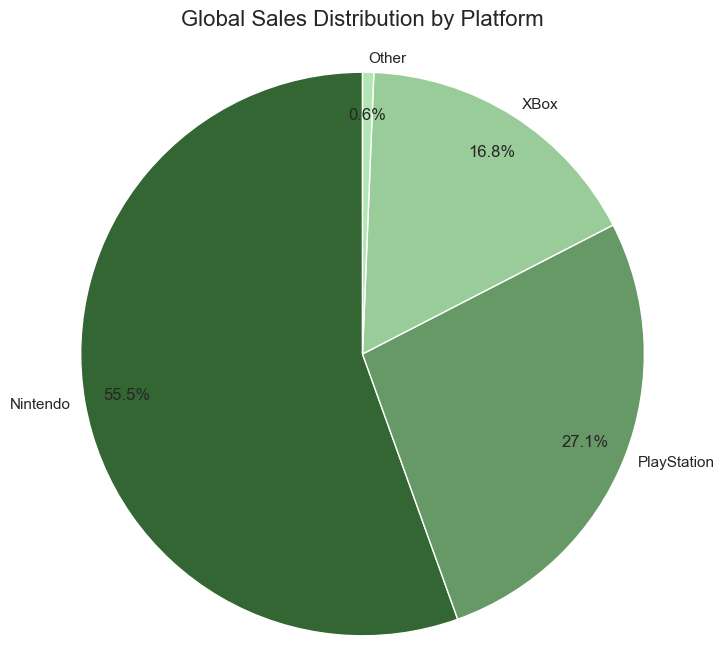

In [219]:
# Calculation
sales_by_platform = games.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Chart
colors = ['#336633', '#669966', '#99CC99', '#B3E6B3', '#CCFFCC', '#D9FFD9', '#E6FFE6', '#F2FFF2', '#F9FFF9', '#FCFFFC']
plt.figure(figsize=(8, 8))
plt.pie(sales_by_platform, labels=sales_by_platform.index, autopct='%1.1f%%', colors=colors, startangle=90, pctdistance=0.85, labeldistance=1.05)
plt.title('Global Sales Distribution by Platform', fontsize=16, y=1.02)
plt.axis('equal')
plt.show()

### Analysis
Playstation has 27.1% of the global sales. I chose a Pie Chart are they are great for visualizing percentages of a whole

## Extra Credit Question 3
What is the distribution of sales for Shooter games?

### Strategy
- Filter the 'Genre for 'Shooter'

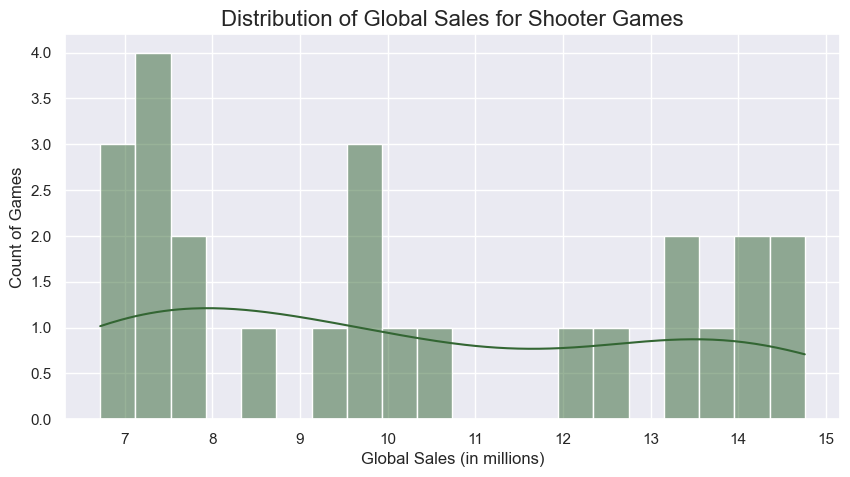

In [220]:
# Calculation
shooter_games = games[games['Genre'] == 'Shooter']

# Chart
plt.figure(figsize=(10, 5))
sns.histplot(data=shooter_games, x='Global_Sales', bins=20, kde=True, color='#336633')
plt.title('Distribution of Global Sales for Shooter Games', fontsize=16)
plt.xlabel('Global Sales (in millions)', fontsize=12)
plt.ylabel('Count of Games', fontsize=12)
plt.show()

### Analysis
There are 25 total shoorter games in the graph. There is a cluster of 9 of them between 6.5 million sales and 8 million. There is a second cluster of 6 between 9 million and 10.5 million. There is a third cluster of 7 between 13 million and 14.5 million. There are 2 between 12 million and 13 million and 1 at 8.5 million.